In [2]:
import pandas as pd
df = pd.read_csv('distance_data.csv')
df

,Name,Address,Distance to Campus(km),Contract Length(week),Price Range(£/week),On Foot(min),By Bike(min),By Public Transport(min),Station 1,Station 2,Station 3,Station 4
0,College Hall,"College Hall, University of London, Malet Stre...",1.2,40,289-392,22,8,16,Goodge Street,Euston Station,Russell Square,King’s Cross
1,International Hall,"International Hall, University of London, Lans...",1.0,40,266-321,19,8,13,Russell Square,Holborn,Euston,King's Cross
2,Butler's Wharf Residence,"Butler's Wharf Residence, 11 Gainsford Street,...",3.2,50,127-278,51,22,34,London Bridge,Tower Hill,Bermondsey,NaN
3,Bankside House,"Bankside House, 24 Sumner Street, London, SE1 9JA",1.5,39,167-297,27,13,24,London Bridge,Southwark,NaN,NaN
4,Carr-Saunders Hall,"Carr-Saunders Hall, 18-24 Fitzroy Street, Lond...",1.6,31,173-259,28,11,23,Warren Street,Euston,NaN,NaN
5,Connaught Hall,"Connaught Hall, University of London, 36-45 Ta...",1.3,40,273-273,21,8,14,Euston Station,Euston Square,King's Cross,Russell Square
6,High Holborn Residence,"High Holborn Residence, 178 High Holborn, Lond...",0.5,39,184-333,11,4,10,Holborn,Covent Garden,NaN,NaN
7,urbanest Westminster Bridge,"urbanest Westminster Bridge, 203 Westminster B...",1.5,39 or 50,227-458,25,9,11,Westminster,Waterloo,Lambeth North,NaN
8,Lilian Knowles House,"Lilian Knowles House, 50 Crispin Street, Londo...",2.9,39 or 50,198-336,45,19,25,Liverpool Street,Shoreditch High Street,NaN,NaN
9,Passfield Hall,"Passfield Hall, 1-7 Endsleigh Place, London, W...",1.5,31,129-287,23,10,15,Euston Square,Euston,NaN,NaN


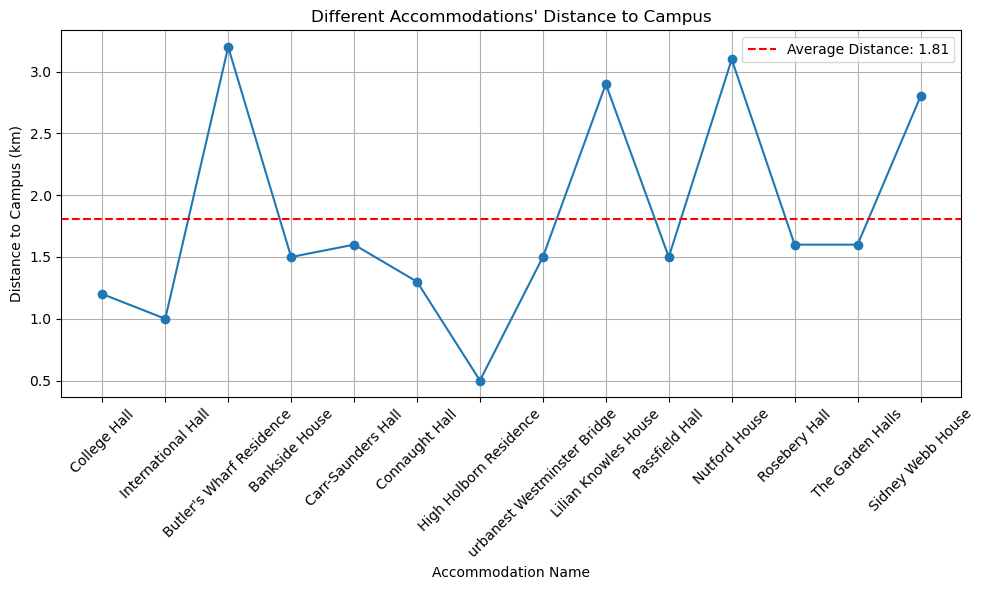

In [3]:
import matplotlib.pyplot as plt

avg_distance = df['Distance to Campus(km)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Name'], df['Distance to Campus(km)'], marker='o', linestyle='-')
plt.axhline(y=avg_distance, color='r', linestyle='--', label=f'Average Distance: {avg_distance:.2f}')
plt.title("Different Accommodations' Distance to Campus")
plt.xlabel('Accommodation Name')
plt.ylabel('Distance to Campus (km)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the accommodations and their distances to campus
accommodations = df[['Name','Distance to Campus(km)','Station 1', 'Station 2', 'Station 3', 'Station 4']]
accommodations['Station 2'][11] = "King's Cross"
accommodations

C:\Users\jenny\AppData\Local\Temp\ipykernel_15992\3316270122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accommodations['Station 2'][11] = "King's Cross"


,Name,Distance to Campus(km),Station 1,Station 2,Station 3,Station 4
0,College Hall,1.2,Goodge Street,Euston Station,Russell Square,King’s Cross
1,International Hall,1.0,Russell Square,Holborn,Euston,King's Cross
2,Butler's Wharf Residence,3.2,London Bridge,Tower Hill,Bermondsey,NaN
3,Bankside House,1.5,London Bridge,Southwark,NaN,NaN
4,Carr-Saunders Hall,1.6,Warren Street,Euston,NaN,NaN
5,Connaught Hall,1.3,Euston Station,Euston Square,King's Cross,Russell Square
6,High Holborn Residence,0.5,Holborn,Covent Garden,NaN,NaN
7,urbanest Westminster Bridge,1.5,Westminster,Waterloo,Lambeth North,NaN
8,Lilian Knowles House,2.9,Liverpool Street,Shoreditch High Street,NaN,NaN
9,Passfield Hall,1.5,Euston Square,Euston,NaN,NaN


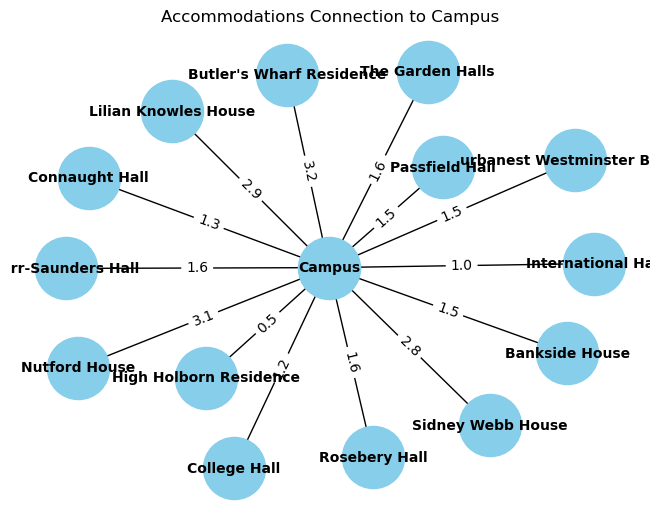

In [80]:


# Create a graph
G = nx.Graph()

# Add nodes for accommodations
for index, row in accommodations.iterrows():
    G.add_node(row['Name'], distance=row['Distance to Campus(km)'])

# Add campus node
G.add_node("Campus")

# Add edges connecting accommodations to the campus
for index, row in accommodations.iterrows():
    G.add_edge(row['Name'], "Campus", distance=row['Distance to Campus(km)'])

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Accommodations Connection to Campus')
plt.show()


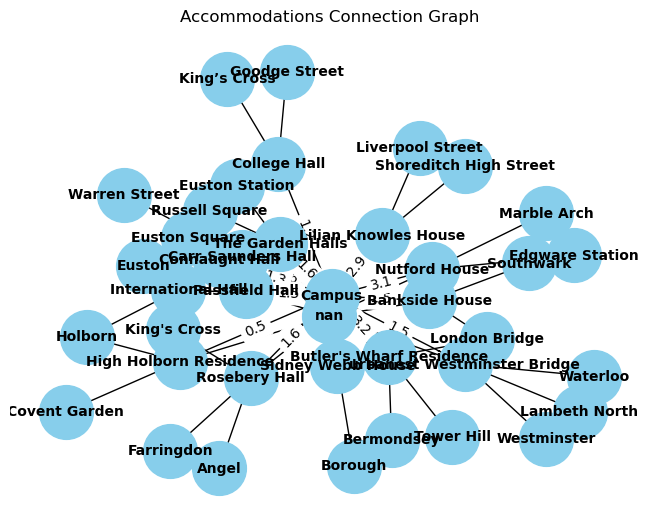

In [104]:

G = nx.Graph()

# Add campus node
G.add_node('Campus')

# Add accommodation nodes and edges to the campus
for _, row in accommodations.iterrows():
    name = row['Name']
    distance = row['Distance to Campus(km)']
    G.add_node(name)
    G.add_edge(name, 'Campus', weight=distance)

    # Add edges for stations
    for station_col in ['Station 1', 'Station 2', 'Station 3', 'Station 4']:
        station = row[station_col]
        if station is not None:
            G.add_edge(name, station)

# Draw the graph
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Accommodations Connection Graph')
plt.show()


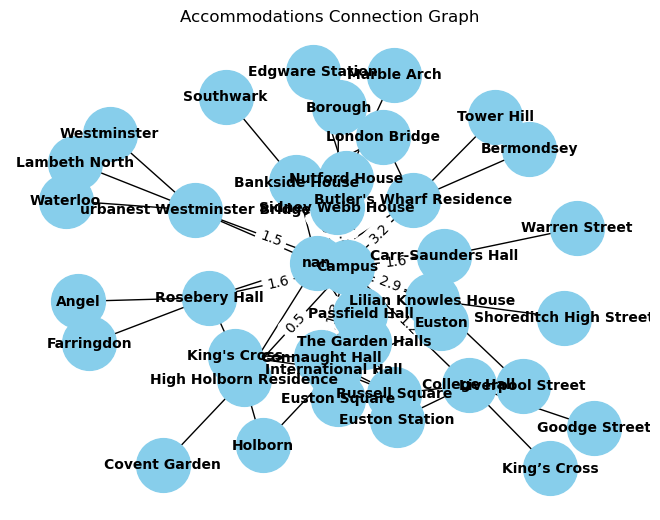

In [109]:
pos = nx.spring_layout(G, scale=1000)  # Adjust scale parameter to increase node spacing
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Accommodations Connection Graph')
plt.show()

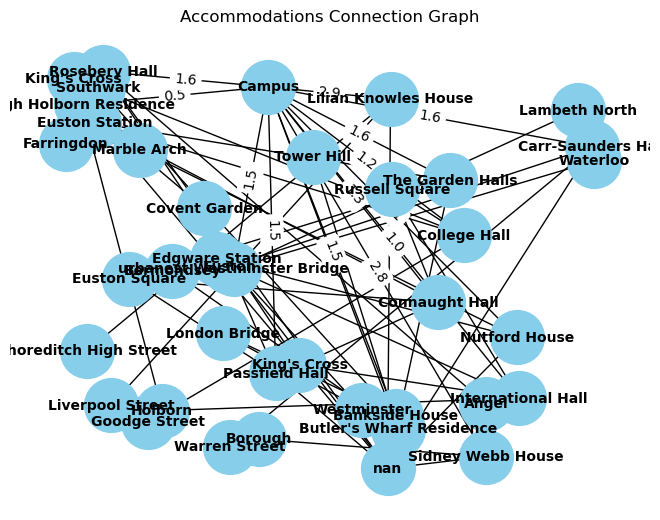

In [110]:
pos = nx.random_layout(G, seed=42)  # Positions nodes randomly with a fixed seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Accommodations Connection Graph')
plt.show()